# Practical Session : Mathematical Morphology and Histogram manipulations

The aim of this practical work is to get acquainted with mathematical morphology
transformations. Applying different operations with several structuring elements on
simple images will allow you understanding the actions, effects and properties of the
operations, the role of the structuring element, as well as the need for appropriate
pre-processing depending on the application at hand.

In this session, we will mainly focus on functions from the skimage.morphology package.

First, you have to download a set of images that you will use throughout the TP: https://partage.imt.fr/index.php/s/9YPTAzKsiXHQWH3

In [1]:
## imports
import matplotlib.pyplot as plt
import skimage.io as skio
import skimage
import numpy as np
import skimage.morphology as morpho
import skimage.segmentation as seg
student = True

## Mathematical morphology

### The structuring element
The basic idea in mathematical morphology is to probe an image with a simple, pre-defined shape, drawing conclusions on how this shape fits or misses the shapes in the image. This simple "probe" is called the structuring element. For example, it can take the shape of a square, a disk or a diamond, with a predefined radius.

Use the function morpho.disk() of the morpho library to visualize a disk structuring element of radius 5. 

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


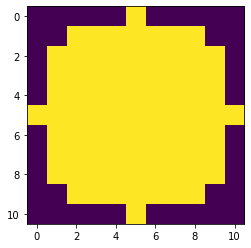

In [2]:
if student :
  strell = morpho.disk(5)

print(strell)
plt.imshow(strell)
plt.show()

Find a way to create a vertical line as a structuring element with parameter length l :

[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]


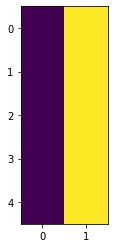

In [3]:
def line_strell(width, length):
    if student:
        strell = np.zeros((length, width), dtype=int)
        strell[:, width // 2] = 1
    return strell

strell = line_strell(2,5)
print(strell)
plt.imshow(strell)
plt.show()

### Binary Morphology
In this section, we will work on a cyto-image. Make sure to properly load the "cell.tif" image. Apply a thresholding of level t = 150 to that image to turn it into a binary image. Visualize the result in greyscale, by using the imshow function.

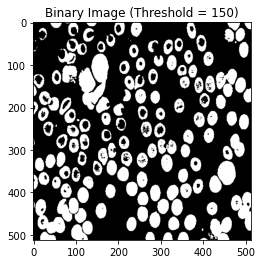

In [18]:
#load the cell image in grayscale and display it 
if student:
  img = skio.imread("images/cell.tif")
  threshold = 150
  binary_img = img < threshold

  plt.imshow(binary_img, cmap="gray")
  plt.title(f"Binary Image (Threshold = {threshold})")
  plt.show()

We will first start by applying simple binary morphological operations on those images. You will try the following operations:
- erosion
- dilation
- opening
- closing

You will try to visualize the results by varying the structuring element and its size.  

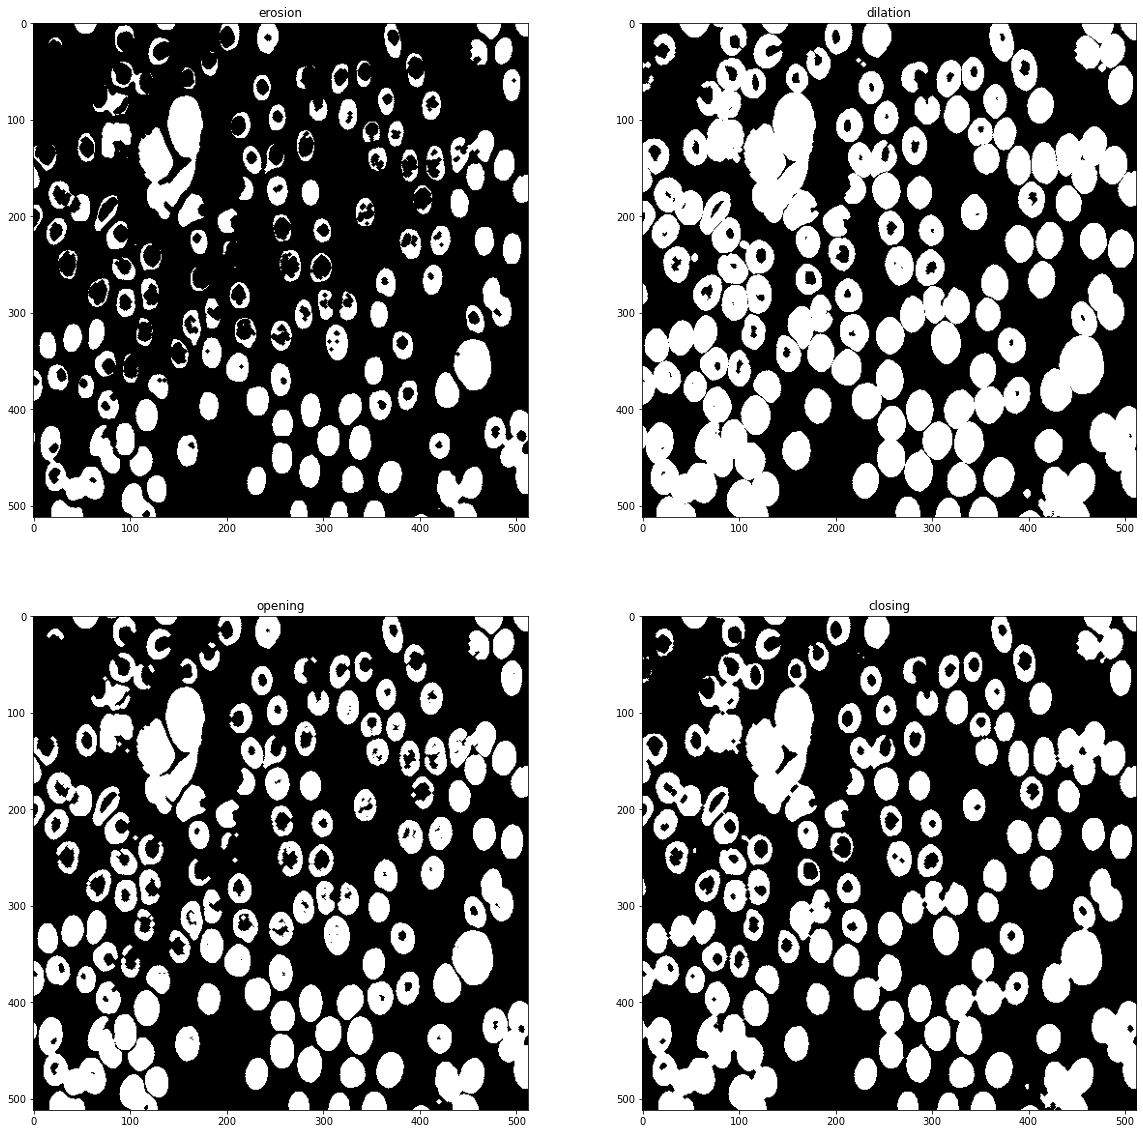

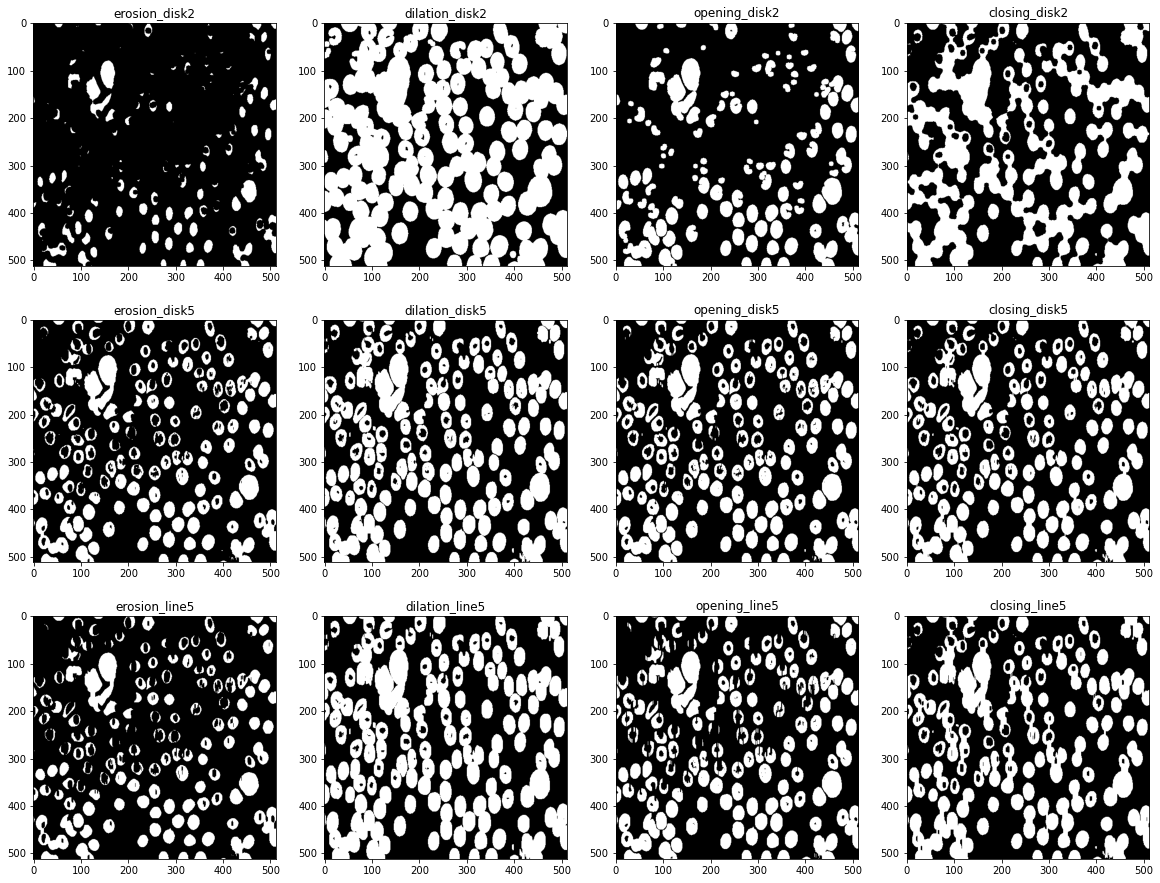

In [95]:
strell = morpho.disk(2)
fig,ax = plt.subplots(2, 2, figsize=(20,20))
morpho_operations = [morpho.erosion, morpho.dilation, morpho.opening, morpho.closing]
imgs = [operation(binary_img, strell) for operation in morpho_operations]# Add in this list the 4 images, obtained with the four operations
names = ["erosion","dilation","opening","closing"]
for i in range(4):
  ax[i//2,i%2].set_title(names[i])
  ax[i//2,i%2].imshow(imgs[i],cmap = "gray")
plt.show()

# try your own structuring elements and make the size vary
if student :
  strells = [morpho.disk(5),line_strell(3,5),line_strell(3,8)]
  strell_names = ["disk2", "disk5", "line5", "line8"]
  fig,ax = plt.subplots(3, 4, figsize=(20,20))
  morpho_operations = [morpho.erosion, morpho.dilation, morpho.opening, morpho.closing] 
  imgs = [operation(binary_img, strell) for strell in strells for operation in morpho_operations]
  operation_names = ["erosion", "dilation", "opening", "closing"]
  names = [f"{op}_{strell}" for strell in strell_names for op in operation_names]
  for i in range(len(imgs)):
    ax[i//4,i%4].set_title(names[i])
    ax[i//4,i%4].imshow(imgs[i],cmap = "gray")
  plt.subplots_adjust(hspace=-0.4)
  plt.show()

- **Q** : What is the influence of the shape of the structuring element ?
- **A** : The shape of the structuring element influences how the shapes in the binary image are modified by the operation. A symmetrical structuring element, such as a disk, preserves the overall shape of objects by applying the operation uniformly in all directions. In contrast, an asymmetrical structuring element, like a line, alters shapes more significantly along the line’s orientation.
- **Q** : What is the influence of the size of the structuring element ?
- **A** : The size of the structuring element affects the scale of the operation. Larger structuring elements impact shapes more significantly, meaning that a greater number of pixels will be modified by the operation.

### Greyscale Morphology
In this section, we will use the bateau.tif image. Make sure to load it and visualize it in greyscale.


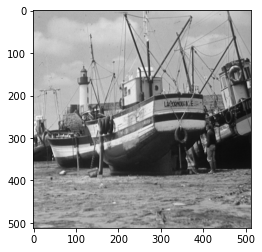

In [34]:
#load the bateau image in grayscale and display it 
if student:
  img = skio.imread("images/bateau.tif")
  plt.imshow(img, cmap = "gray")
  plt.show()

Apply the same 4 operations as before (dilation,erosion,opening,closing) and visualize the results. Try out different structuring elements and different sizes.

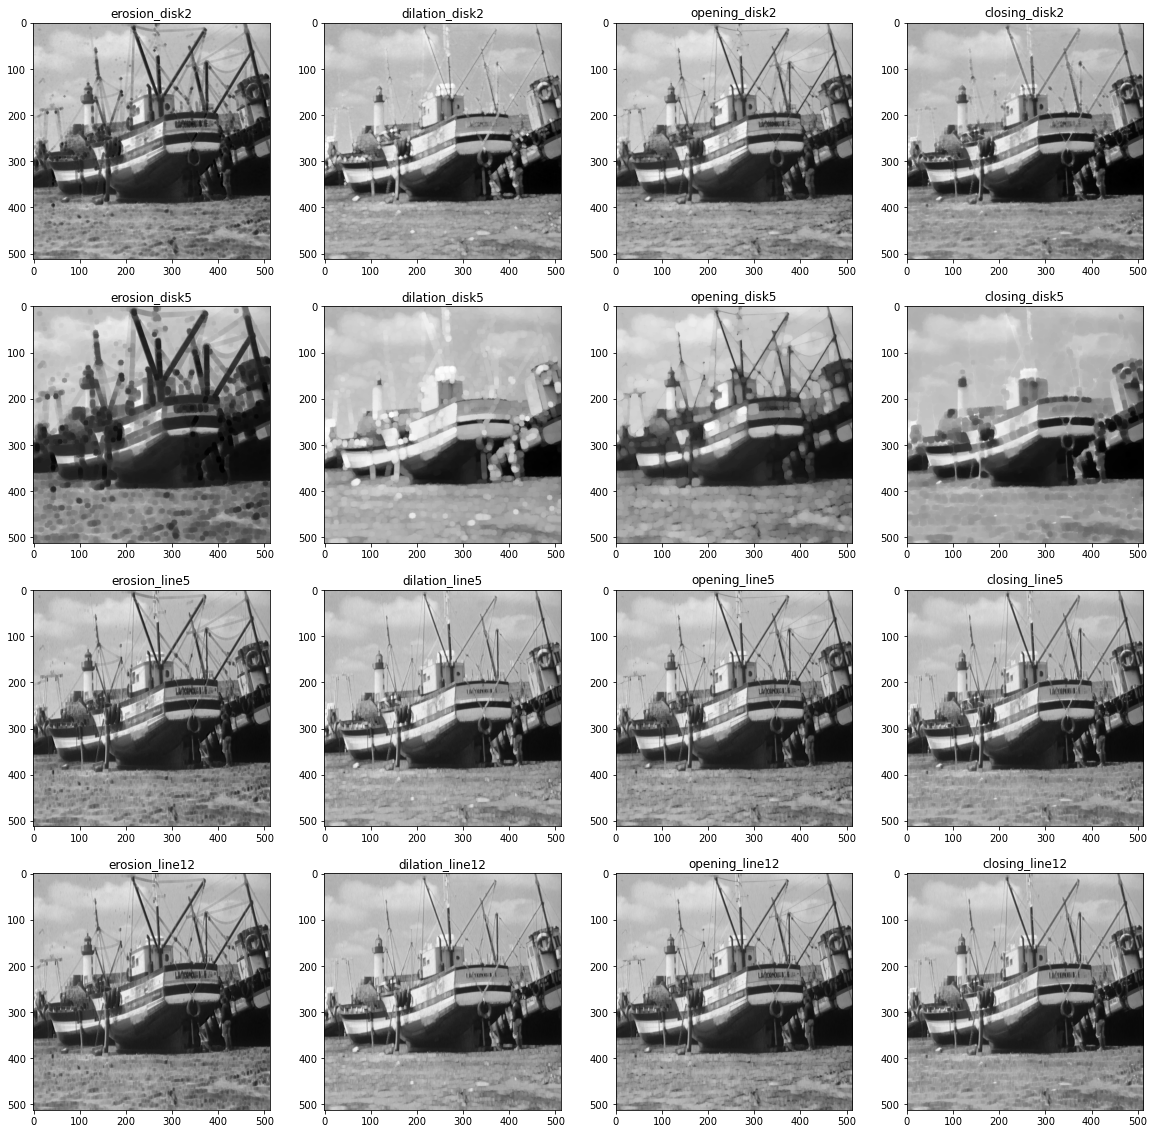

In [88]:
if student:
  strells = [morpho.disk(2),morpho.disk(5),line_strell(3,5),line_strell(3,12)]
  strell_names = ["disk2", "disk5", "line5", "line12"]
  fig,ax = plt.subplots(4, 4, figsize=(20,20))
  morpho_operations = [morpho.erosion, morpho.dilation, morpho.opening, morpho.closing] 
  imgs = [operation(img, strell) for strell in strells for operation in morpho_operations]
  operation_names = ["erosion", "dilation", "opening", "closing"]
  names = [f"{operation}_{strell}" for strell in strell_names for operation in operation_names]
  for i in range(len(imgs)):
    ax[i//4,i%4].set_title(names[i])
    ax[i//4,i%4].imshow(imgs[i],cmap = "gray")
  plt.show()

- **Q** : What is the influence of the shape and size parameters of the structuring element ?
- **A** : The shape of the structuring element influences how the darker/lighter shapes in the greyscale image are modified by the operation. A symmetrical structuring element, such as a disk, preserves the overall shape of objects by applying the operation uniformly in all directions. In contrast, an asymmetrical structuring element, like a line, alters shapes more significantly along the line’s orientation. Moreover, the size of the structuring element affects the scale of the modifications.

- **Q** : We then now try to illustrate the iterativity property. What is the
result of a dilation by a disk structuring element of size 2 followed by a dilation by a
disk structuring element of size 3? Compare it with a dilation by a disk of size 5. Explain.
- **A** : The result of a sequential dilation using disks of sizes 2 and 3 is similar to a single dilation with a disk of size 5, but they are not identical. The theorical iteration property says that they should be identical, because the Minkowski addition of 2 perfect continuous disks (withs radius r1 and r2) should be equal to the perfect disk with radius r1+r2. However here we have discret disks so Minkowski addition of 2 disks have slightly different borders than the bigger disk. For uniform surfaces, the two methods give identical results, but near to the edge of shapes there are some differences.

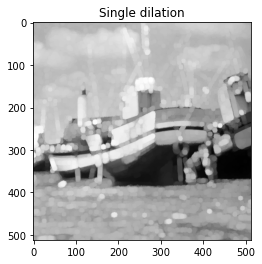

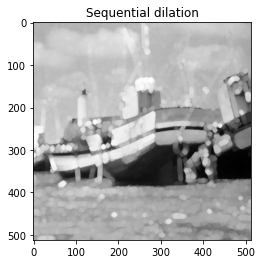

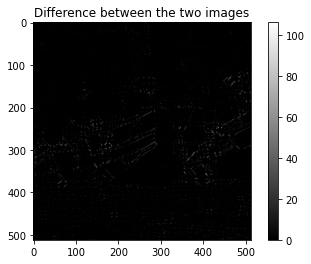

195761


In [46]:
if student:
  ### start code
  dilation = morpho.dilation(img,morpho.disk(5))
  plt.imshow(dilation,cmap = "gray")
  plt.title("Single dilation")
  plt.show()

  sequential_dilation = morpho.dilation(morpho.dilation(img, morpho.disk(2)), morpho.disk(3))
  plt.imshow(sequential_dilation,cmap = "gray")
  plt.title("Sequential dilation")
  plt.show()

  plt.imshow(dilation-sequential_dilation,cmap = "gray")
  plt.title('Difference between the two images')
  plt.colorbar()
  plt.show()
  print(np.sum(np.abs(dilation-sequential_dilation)))

- **Q:** Plot the result of an dilation by a disk structuring element of size 2 followed by
an dilation by a disk structuring element of size 3? 
Compare with a dilation of the image by (a disk of size 2 dilated by a disk of size 3). Please note that you might have to use the np.pad function to perform this. Conclude.
- **A:** Here we did not approximate the disks as perfect continuous circles for the Minkowski addition. Instead, we applied the theoretical definition directly: the Minkowski addition of two discrete disks is equal to the dilation of one disk by the other. Using this approach, we find that the iteration property is true.

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


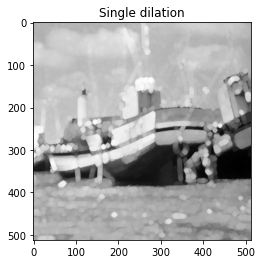

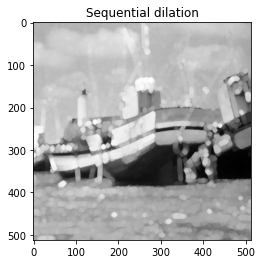

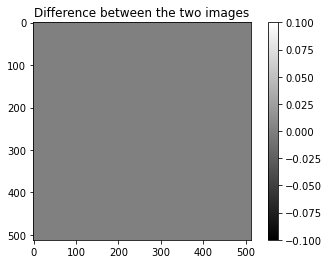

0


In [51]:
if student:
 # First create the sequential structuring element, that is a disk of size 2 dilated by a disk of size 3
  sqr_strell = morpho.disk(2)
  sqr_strell = np.pad(sqr_strell, pad_width=3, mode='constant', constant_values=0)
  sqr_strell = morpho.dilation(sqr_strell, morpho.disk(3))
  print(sqr_strell)

  # Use it to perform the image dilation
  dilation = morpho.dilation(img,sqr_strell)
  plt.imshow(dilation,cmap = "gray")
  plt.title("Single dilation")
  plt.show()
  
  # Compare it with the sequential dilation
  sequential_dilation = morpho.dilation(morpho.dilation(img, morpho.disk(2)), morpho.disk(3))
  plt.imshow(sequential_dilation,cmap = "gray")
  plt.title("Sequential dilation")
  plt.show()
    
  plt.imshow(dilation-sequential_dilation,cmap = "gray")
  plt.title('Difference between the two images')
  plt.colorbar()
  plt.show()
  print(np.sum(np.abs(dilation-sequential_dilation)))

- **Q:** How can you illustrate the idempotence of closing ? Show your illustration in the following cell.


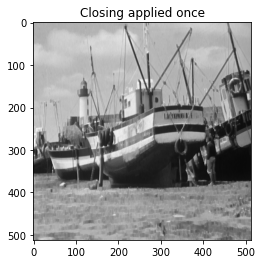

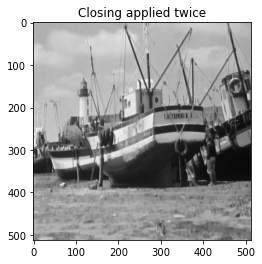

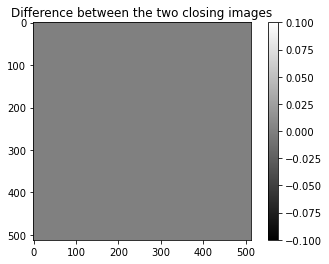

0


In [55]:
if student :
  strell = morpho.disk(5)
  closing1 = morpho.closing(img, strell)
  plt.imshow(closing1,cmap = "gray")
  plt.title("Closing applied once")
  plt.show() 
  
  closing2 = morpho.closing(closing1, strell)
  plt.imshow(closing2,cmap = "gray")
  plt.title("Closing applied twice")
  plt.show()
    
  plt.imshow(closing1-closing2,cmap = "gray")
  plt.title('Difference between the two closing images')
  plt.colorbar()
  plt.show()
  print(np.sum(np.abs(closing1-closing2)))


- **Q** : Perform a top-hat transform in the following cell (difference between the image and its opening).
Comment the result depending on the choice of the structuring element.
- **A** : The top-hat transform highlights details that are smaller than the structuring element and brighter than their surroundings, as these are removed during the opening operation. Therefore, the size of the structuring element affects the size of the bright regions revealed by the top-hat transform (the bigger the structuring element, the bigger the bright zones). Moreover, the shape of the structuring element influences the shape of the highlighted areas: a disk shows bright zones of all shapes smaller than itself due to its symmetry, while a line shows bright details that are orthogonal to its direction (because details aligned with the line orientation tend to be longer than the structuring element so they don't disappear during the opening operation in contrary of orthogonal details).

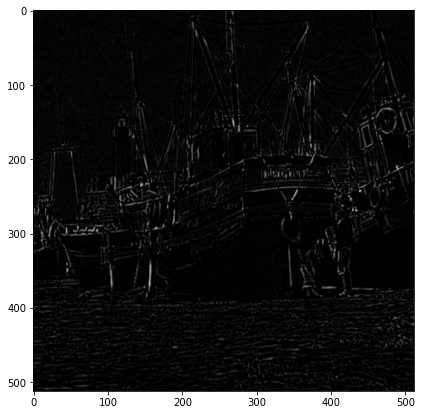

In [87]:
if student:
  strell = morpho.disk(2)
  #strell = morpho.disk(5)
  #strell = line_strell(3,5)
  #strell = line_strell(3,5).T
  top_hat = img - morpho.opening(img, strell)
plt.figure(figsize = (7,7))
plt.imshow(top_hat,cmap = "gray")
plt.show()

- **Q** : Perform a dual top-hat transform in the following cell (difference between the closing and the image).
Comment the result depending on the choice of the structuring element.
- **A** : The dual top-hat transform highlights details that are smaller than the structuring element and darker than their surroundings, as these are removed during the closing operation. Therefore, the size of the structuring element affects the size of the dark regions revealed by the top-hat transform (the bigger the structuring element, the bigger the dark zones). Moreover, the shape of the structuring element influences the shape of the highlighted areas: a disk shows dark zones of all shapes smaller than itself due to its symmetry, while a line shows dark details that are orthogonal to its direction (because details aligned with the line orientation tend to be longer than the structuring element so they don't disappear during the opening operation in contrary of orthogonal details).

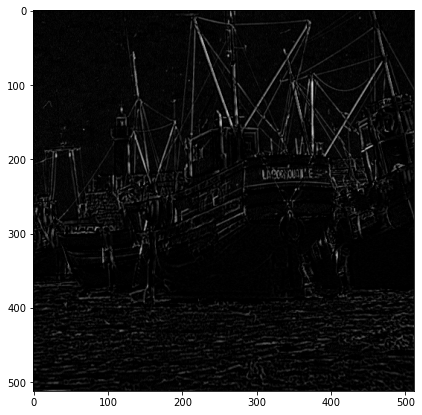

In [105]:
if student:
  strell = morpho.disk(2)
  #strell = morpho.disk(5)
  #strell = line_strell(3,5)
  #strell = line_strell(3,5).T
  dual_top_hat = morpho.closing(img, strell) - img
plt.figure(figsize = (7,7))
plt.imshow(dual_top_hat,cmap = "gray")
plt.show()

### Alternating Filters
- **Q**: Perform alternate sequential filters, for instance by performing sequential opening and then closing by squares of radius ranging from 1 to 5. Also try out your own combinations. What kind of filtering can be expected from such
operations?
- **A**: This succession of operations applies a low-pass filter to the image. We begin by removing small bright details (with opening), followed by small dark details (with closing). Then, we gradually increase the size of the structuring element to remove larger details. At the end, the image no longer contains details smaller than the largest structuring element used, so we have removed the high frequencies which corresponds to low-pass filtering.

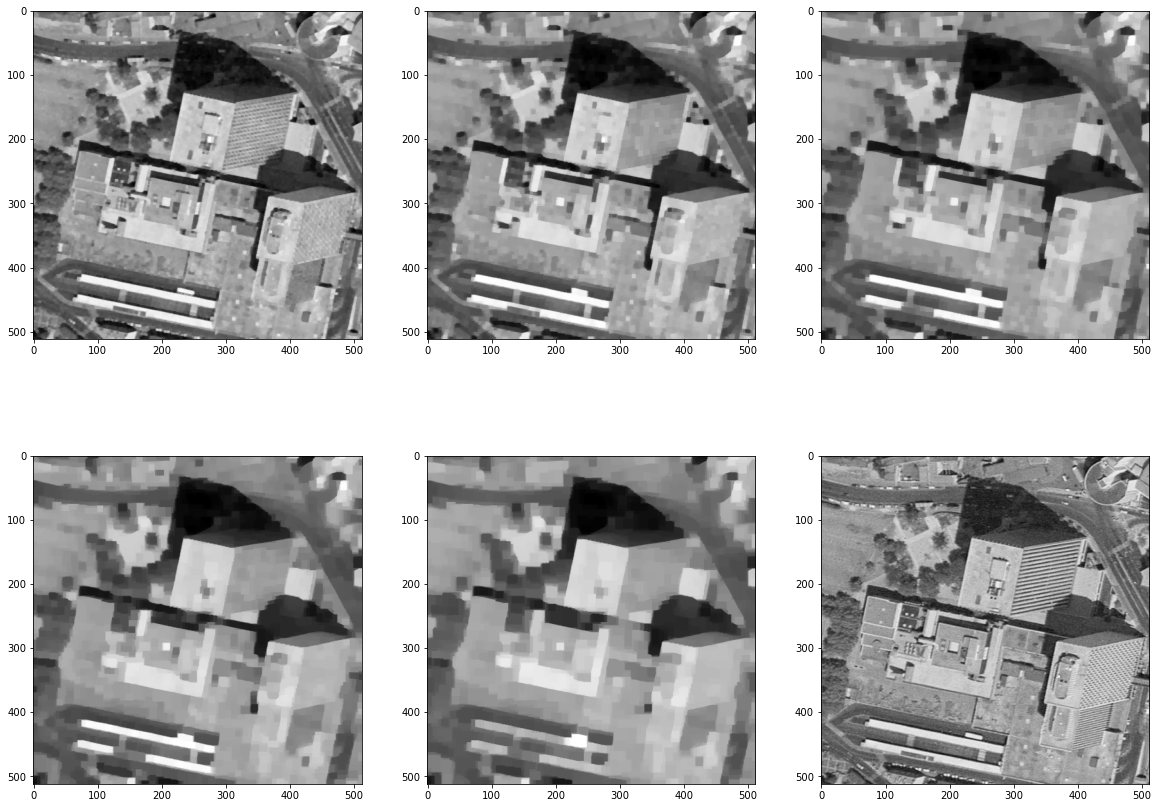

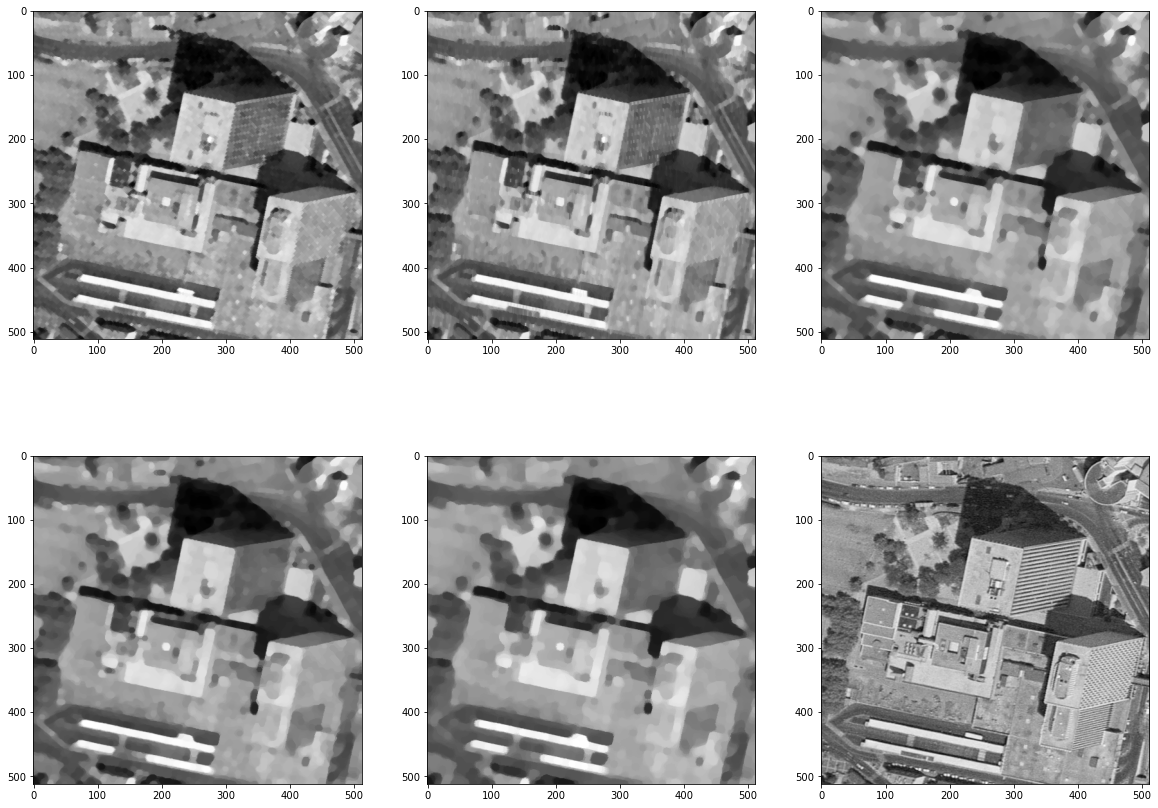

In [118]:
# Example
img = skio.imread("images/montreuil.tif")

# Structuring elements
se1 = morpho.square(3)
se2 = morpho.square(5)
se3 = morpho.square(7)
se4 = morpho.square(9)
se5 = morpho.square(11) # radius = (widht-1)/2

# Images
fas1= morpho.closing(morpho.opening(img, se1), se1)
fas2= morpho.closing(morpho.opening(fas1, se2), se2)
fas3= morpho.closing(morpho.opening(fas2, se3), se3)
fas4= morpho.closing(morpho.opening(fas3, se4), se4)
fas5= morpho.closing(morpho.opening(fas4, se5), se5)

fig,ax = plt.subplots(2,3,figsize = (20,15))
ax[0,0].imshow(fas1,cmap = "gray")
ax[0,1].imshow(fas2,cmap = "gray")
ax[0,2].imshow(fas3,cmap = "gray")
ax[1,0].imshow(fas4,cmap = "gray")
ax[1,1].imshow(fas5,cmap = "gray")
ax[1,2].imshow(img,cmap = "gray")
plt.show()

#Try you own
if student :
  se1 = morpho.disk(2)
  se2 = line_strell(3,5)
  se4 = line_strell(3,5).T
  se3 = morpho.disk(4)
  se5 = morpho.disk(5)

  # Images
  fas1= morpho.closing(morpho.opening(img, se1), se1)
  fas2= morpho.closing(morpho.opening(fas1, se2), se2)
  fas3= morpho.closing(morpho.opening(fas2, se3), se3)
  fas4= morpho.closing(morpho.opening(fas3, se4), se4)
  fas5= morpho.closing(morpho.opening(fas4, se5), se5)

  fig,ax = plt.subplots(2,3,figsize = (20,15))
  ax[0,0].imshow(fas1,cmap = "gray")
  ax[0,1].imshow(fas2,cmap = "gray")
  ax[0,2].imshow(fas3,cmap = "gray")
  ax[1,0].imshow(fas4,cmap = "gray")
  ax[1,1].imshow(fas5,cmap = "gray")
  ax[1,2].imshow(img,cmap = "gray")
  plt.show()
   

### Segmentation
 - **Q** : Apply a morphological gradient to the image cell.tif (difference between
dilation and erosion with a structuring element of radius1). What do you observe ?

- **A**: The morphological gradient highlight the edge of the cells because this is where there is a big difference between the dilation and the erosion (and not in the constant areas). But there is also some noise, some parasite edges and some shapes taht are not closed which is not good for segmentation.

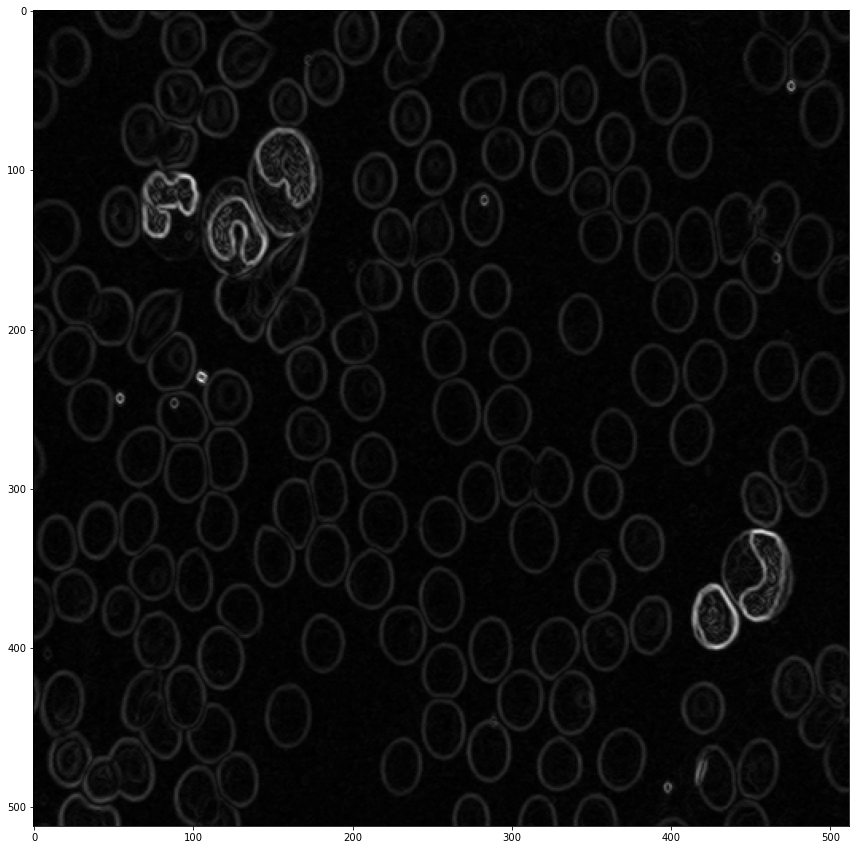

In [182]:
if student : 
  img = skio.imread("images/cell.tif")
  strell = morpho.disk(1)
  morpho_grad = morpho.dilation(img, strell) - morpho.erosion(img, strell)
plt.figure(figsize=(15,15))
plt.imshow(morpho_grad,cmap = "gray")
plt.show()


- **Q** : Try to threshold the gradient with a value of 25 for instance. Why is is difficult to find an appropriate threshold value ?
- **A** : We want to treshold the gradient to get only the borders of cells but if we use a treshold too high like 25 we lose most of cells border, if we use a smaller treshold like 10 we have most of cells but the majority of borders are not closed and if we use a too small trashold like under 5 we get a lot of parasite noise and shapes. It is difficult to find a good treshold because some noise and parasite shapes are as strong as some cells borders so we can't find a perfect treshold.

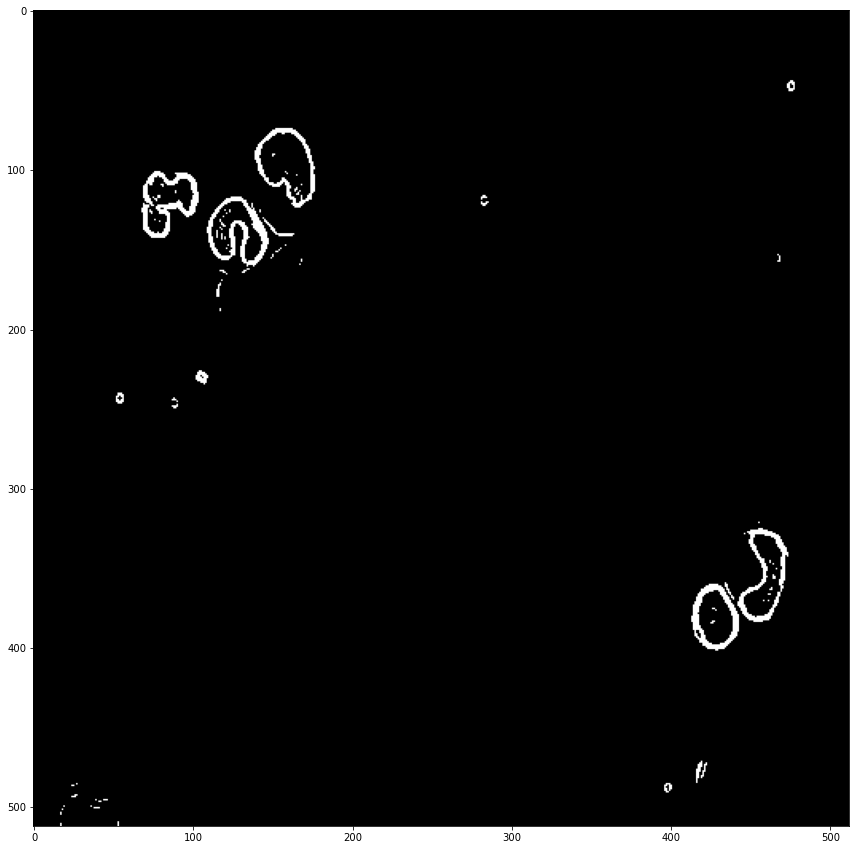

In [164]:
if student :
  thresh_grad = morpho_grad > 25
plt.figure(figsize=(15,15))
plt.imshow(thresh_grad,cmap  ="gray")
plt.show()

- **Q** Apply the watershed algorithm to the gradient image using seg.watershed(morpho_grad,k) ;
What do you observe ? 
- **A** : The watershed algorithm segment de cell image based on the values of its gradient, creating areas for local minima. We can see that some cells are correctly segmented but a lot of theme are merged with other cells or with the background (mostly because their borders are not fully closed). We can also see some over segmentation in the noisy parts (because of the noise but also the edges which can be too detailed and irregular). The algorithm also segment parts with no clear border like for the almost uniform background.
- **Q** Try to change the parameter k ; what is the role of that parameter ?
- **A** : The parameter k determines the number of initial markers for the watershed algorithm. A lower k result in fewer an larger regions in the segmentation while a higher k creates a more precised segmentation with more regions which are smaller. It's important to chose k not too small so we have enough regions to separate the cells but not too high so the cells are still united and no over segmented.

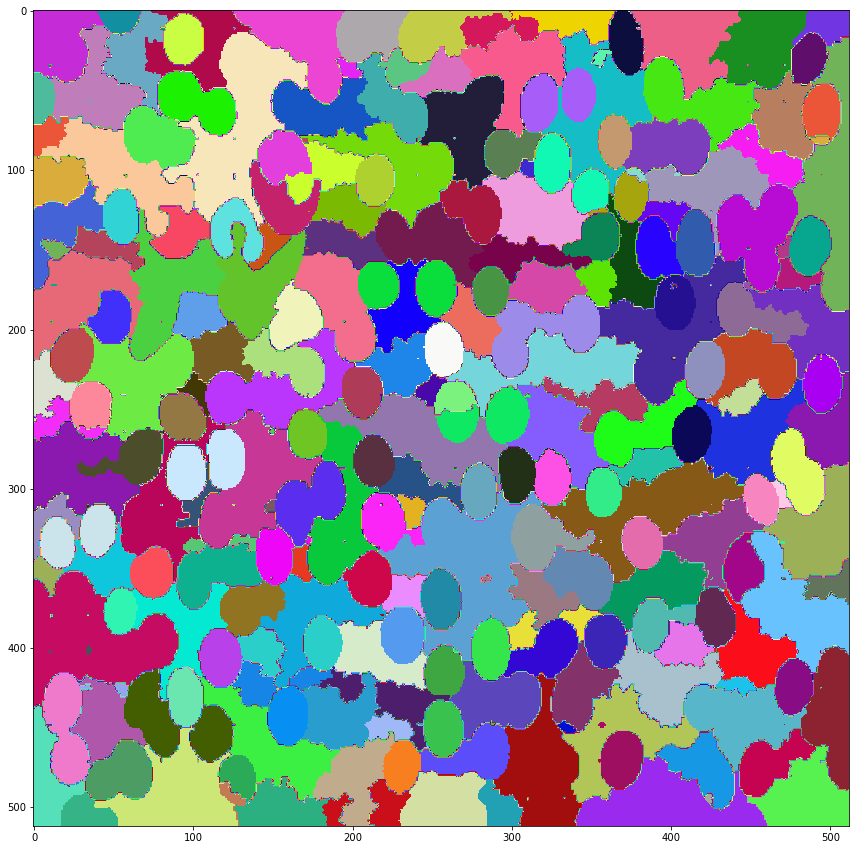

In [167]:
import matplotlib
cmaprand = matplotlib.colors.ListedColormap ( np.random.rand ( 256,3))
if student :
  wat = seg.watershed(morpho_grad, markers=500)

plt.figure(figsize =(15,15))
plt.imshow(wat, cmap =cmaprand)
plt.show()

- **Q** : Apply first a closing on the gradient image and then the watershed. Is the result better ? In which sense and why ?
- **A** : Applying a closing on the gradient leads to close the border of the cells which is usefull for the segmentation to separated cells from de background. In this sense, the result is a bit better with less cells merged with the background. But this method leads to an other problem : the closing tends to merge cells if they are close to each other.
- **Q** : Apply an opening with the same structuring element on the gradient image and then do a watershed. What is the difference between this operation and the previous? 
- **A** : This operation is the inverse of the previous one. The opening tends to open the border of cells, which is not really good for segmentation because they are merged with the background. But this operation is usefull to reduce the noise and the irregularity of the cell border which is importante to reduce the number of fake regions.

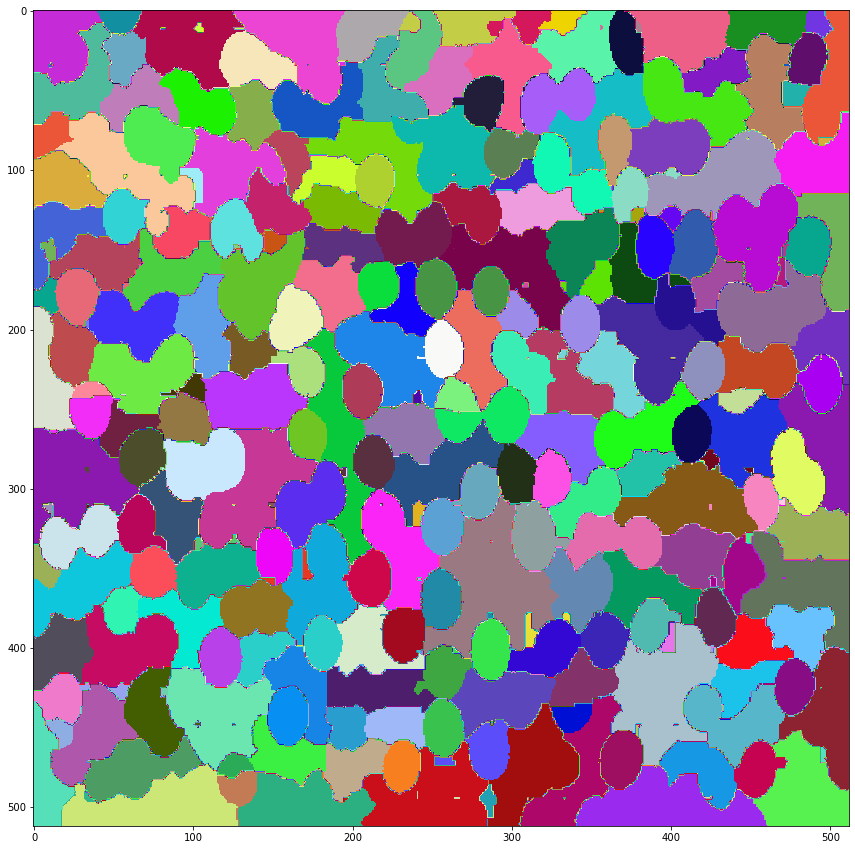

In [179]:
if student :
  strell = morpho.disk(3)
  wat_closing = seg.watershed(morpho.closing(morpho_grad, strell), markers=500)
plt.figure(figsize =(15,15))
plt.imshow(wat_closing,cmap =cmaprand)
plt.show()

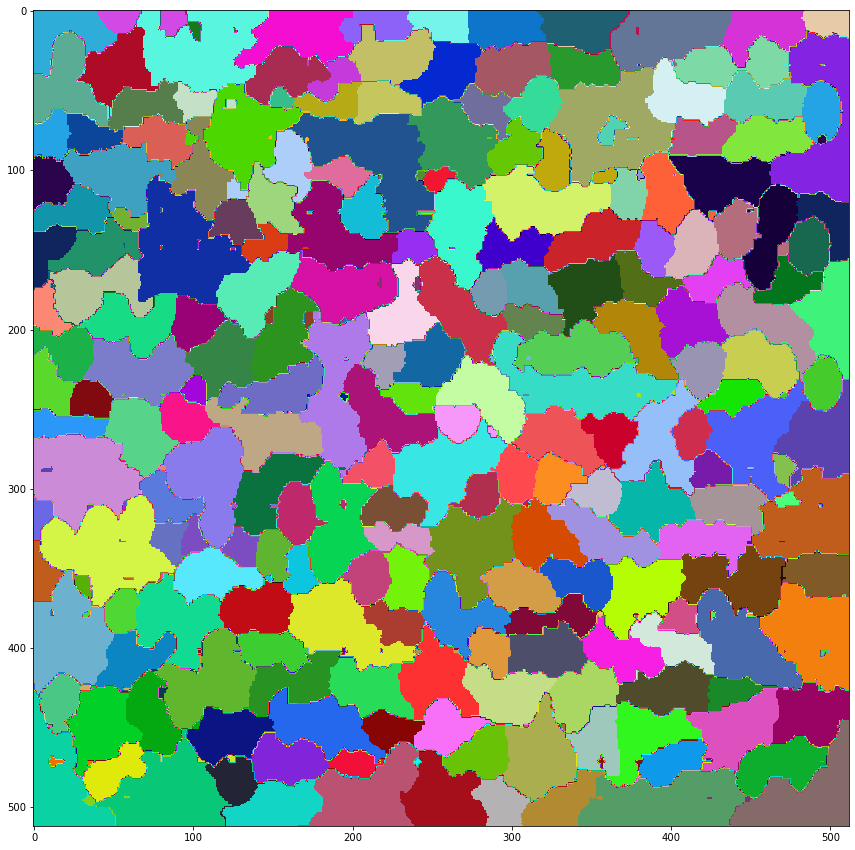

In [143]:
if student :
  strell = morpho.disk(3)
  wat_opening = seg.watershed(morpho.opening(morpho_grad, strell), markers=500)
plt.figure(figsize =(15,15))
plt.imshow(wat_opening,cmap =cmaprand)
plt.show()

Your objective is to try to do better than what you did with the closure and opening. To do that, we propose to use specific markers for the watershed transform.

**Q** : In the next cell, compute the reconstruction from an opening of the gradient. You can use as structuring element a disk of size 5. What do you observe ? Could it help you to efficiently segment the cells ?

**A** : We can see that the edges of cells are thicker and more regular but they are not fully merged with their neighboors which could help to better segment the cells (but the noise is also increased which can be a problem)

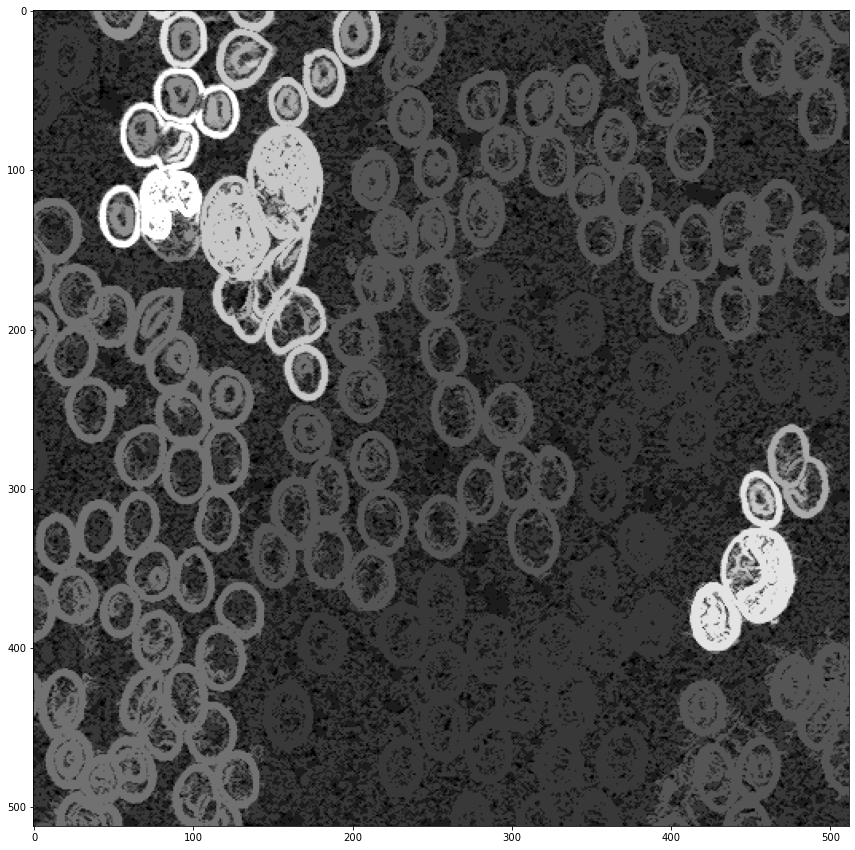

In [187]:
imOpen = morpho.opening(morpho_grad, morpho.disk(5))
reco= morpho.reconstruction(imOpen, morpho_grad)
plt.figure(figsize =(15,15))
plt.imshow(reco,cmap = "gray")
plt.show()

**Q** : In the next cell, compute the reconstruction from an closing of the gradient. You can use as structuring alement a disk of size 5. What do you observe ? Could it help you to efficiently segment the cells ?

**A** : We can see that the noise is reduced but the overall shape of cells is maintained which could help to segment more efficiently the cells

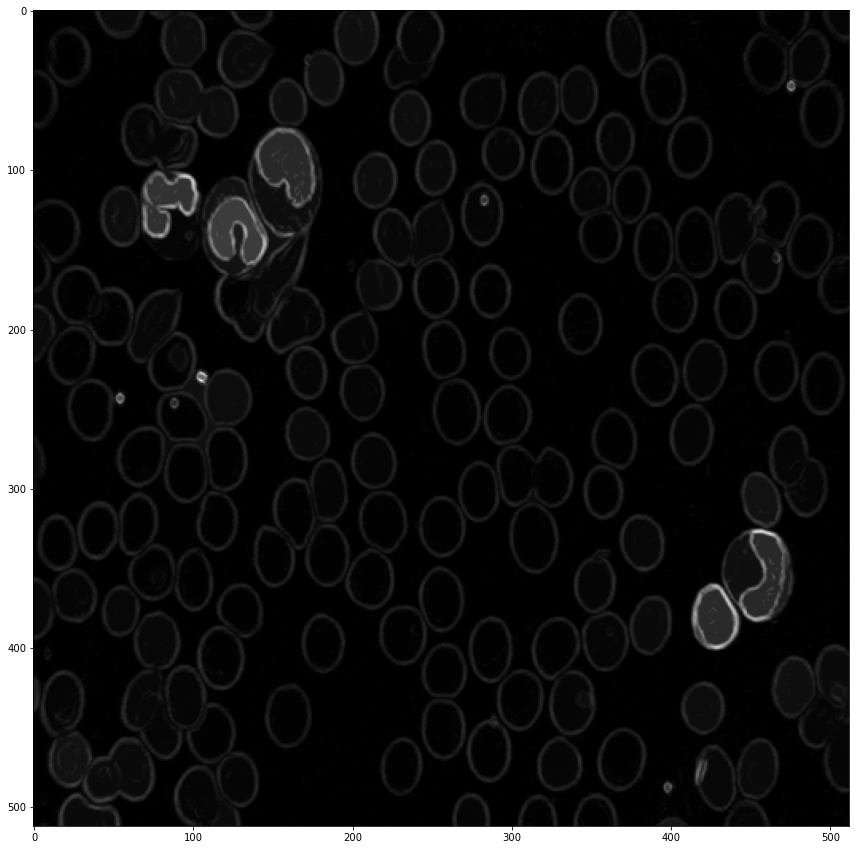

In [173]:
imClos = morpho.closing(morpho_grad, morpho.disk(5))
reco= morpho.reconstruction(imClos, morpho_grad,method='erosion')
plt.figure(figsize =(15,15))
plt.imshow(reco,cmap = "gray")
plt.show()

**Q** : This last part is less guided. Use the reconstruction operation and the above questions to find good markers for the watershed algorithm. You could benefit from using the peak_local_max function of skimage.feature

C:\Users\natha\AppData\Local\Temp/ipykernel_29436/3135028922.py:8: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi = peak_local_max(reco_open, indices=False, min_distance=16)


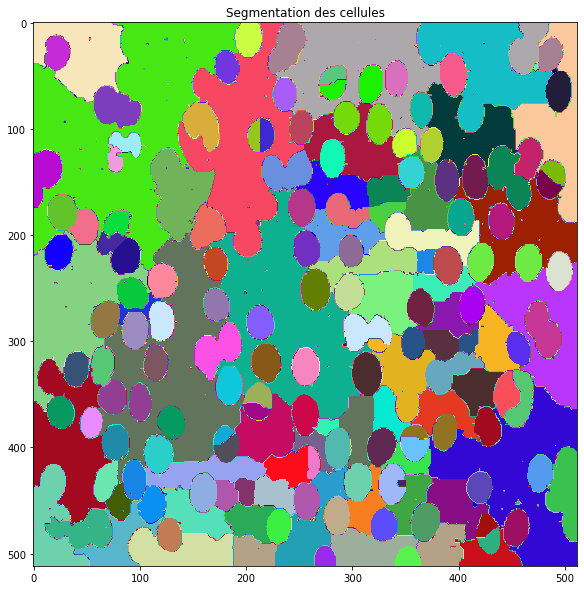

In [200]:
from skimage.feature import peak_local_max
from scipy import ndimage as ndi

imOpen = morpho.opening(morpho_grad, morpho.disk(5))
reco_open = morpho.reconstruction(imOpen, morpho_grad)


local_maxi = peak_local_max(reco_open, indices=False, min_distance=16)
markers, _ = ndi.label(local_maxi)

imClos = morpho.closing(morpho_grad, morpho.disk(5))
reco_clos = morpho.reconstruction(imClos, morpho_grad, method='erosion')

wat = seg.watershed(reco_clos, markers=markers)

plt.figure(figsize=(10,10))
plt.imshow(wat, cmap=cmaprand)
plt.title("Segmentation des cellules")
plt.show()
